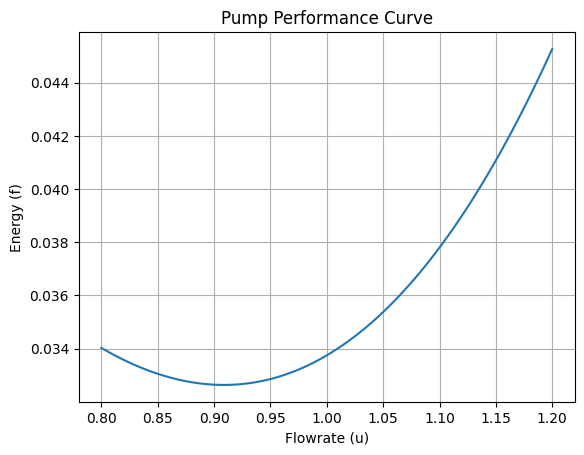

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

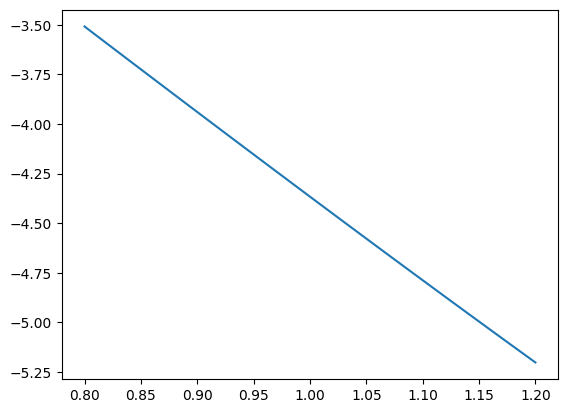

In [60]:
# generate an approximation for a simple pump performance curve given by a 3rd order polynomial fit with the flowrate as input and energy as output

def ppf_approx(u, alpha=0.025): # polynomial approximation of the energy price function due to water injection by pumps
    return (3.15 - (- 3.1 * u**3 + 3.4 * u**2 + 1.5 * u))*alpha

import numpy as np

u = np.linspace(0.8, 1.2, 100)
f = ppf_approx(u)

import matplotlib.pyplot as plt

plt.plot(u, f)
plt.xlabel('Flowrate (u)')
plt.ylabel('Energy (f)')
plt.title('Pump Performance Curve')
plt.grid(True)
plt.show()  

ro = 5.0
rwp = 0.1

qtk = np.linspace(0.8, 1.2, 100)


qro = (1-0.1)*ro 
qwp = rwp*qtk
qppf = ppf_approx(qtk)

cost = -qtk*(qro - qwp - qppf)



plt.plot(qtk, cost)
plt.plot(qtk, qro, color="green")
# plt.plot(qtk, qwp, color="blue")
plt.plot(qtk, qppf, color="red")
plt.xlabel('Flowrate (u)')
plt.ylabel('Cost')
plt.title('Cost')
plt.grid(True)
plt.show() 

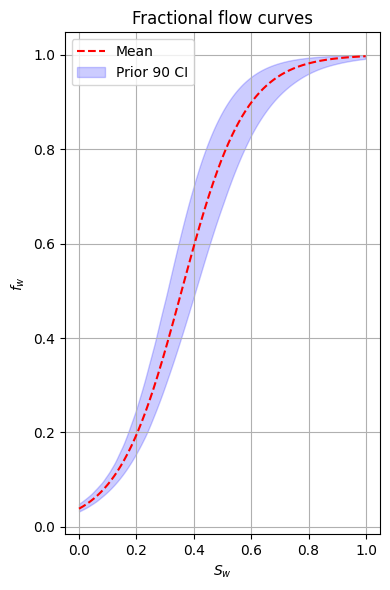

In [2]:

from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# https://perminc.com/resources/fundamentals-of-fluid-flow-in-porous-media/chapter-4-immiscible-displacement/buckley-leverett-theory/
mu_o = 5.0
mu_w = 1.0

ratio = lambda a, b, Sw : 1/(1 +  (mu_o/mu_w) * (a*np.exp(-b*Sw)))

a_mean = 5.0
b_mean = 9.0

a_std = a_mean/5
b_std = b_mean/5

# perturb a and b
# aw = np.random.normal(loc=a_mean, scale=a_std, size=1000)
# bw = np.random.normal(loc=b_mean, scale=b_std, size=1000)

aw = np.load("./data/aw.npy").flatten()
bw = np.load("./data/bw.npy").flatten()

a_true = np.load("./data/a_true.npy")
b_true = np.load("./data/b_true.npy")

Sw = np.arange(0.0, 1.0, 0.001)

fw = np.array([np.array([ratio(a, b, sw) for sw in Sw]) for a, b in zip(aw, bw)]).T

fw_nom = np.array([ratio(a_mean, b_mean, sw) for sw in Sw])
fw_true = np.array([ratio(a_true, b_true, sw) for sw in Sw])

fw95 = np.percentile(fw, 95, axis=1)
fw5 = np.percentile(fw, 5, axis=1)

fw75 = np.percentile(fw, 75, axis=1)
fw25 = np.percentile(fw, 25, axis=1)

fw55 = np.percentile(fw, 55, axis=1)
fw45 = np.percentile(fw, 45, axis=1)

fwmean = np.mean(fw, axis=1)

plt.figure(figsize=(4,6))
# plt.plot(Sw, fw, color="blue", alpha=0.002)
# plt.plot(Sw, fw95, color="blue", alpha=0.2)
# plt.plot(Sw, fw5, color="blue", alpha=0.2)
plt.fill_between(Sw, fw5, fw95, color="blue", alpha=0.2)
# plt.plot(Sw, fw75, color="blue", alpha=0.2)
# plt.plot(Sw, fw25, color="blue", alpha=0.2)
# plt.fill_between(Sw, fw25, fw75, color="blue", alpha=0.2)
# plt.plot(Sw, fw55, color="blue", alpha=0.2)
# plt.plot(Sw, fw45, color="blue", alpha=0.2)
# plt.fill_between(Sw, fw45, fw55, color="blue", alpha=0.2)
# plt.plot(Sw, fwmean, color="blue", linestyle="dashed")
plt.plot(Sw, fw_nom, color="red", linestyle="dashed")
# plt.plot(Sw, fw_true, color="green", linestyle="dashed")
# plt.hlines(0.0, 0.0, 1.0, linestyles="dashed", colors="black")
# plt.hlines(1.0, 0.0, 1.0, linestyles="dashed", colors="black")
plt.title("Fractional flow curves")
plt.xlabel("$S_w$")
plt.ylabel("$f_w$")

legend_elements = [Line2D([0], [0], color="red", linestyle="dashed", label="Mean"),
                   Patch(facecolor="blue", edgecolor="blue", alpha=0.2, label="Prior 90 CI")]
plt.legend(handles=legend_elements)
plt.grid()
plt.tight_layout()
plt.savefig("fractional_flow.png")

In [3]:
aw

array([5.07494901, 5.74248381, 3.85017029, 4.63063987, 5.56369808,
       5.08039311, 5.18806036, 4.87257247, 4.64420552, 4.42403433,
       4.89222338, 5.80211834, 3.95031874, 4.61418131, 5.57377313,
       4.98040847, 5.18802082, 5.04566996, 4.42890892, 4.18064797,
       4.65365796, 5.80164976, 4.0382985 , 4.7025391 , 5.54787532,
       4.87061841, 5.23513677, 5.28183503, 4.22010507, 4.00932545,
       4.42643686, 5.686456  , 4.07326655, 4.86996081, 5.53308746,
       4.80015694, 5.29129148, 5.54638281, 4.06847536, 3.93201096,
       4.26250392, 5.42543462, 4.0392482 , 5.05712863, 5.55716852,
       4.78807244, 5.28981494, 5.80239007, 3.99158258, 3.94921098,
       4.17990912, 5.0346056 , 3.95549944, 5.19365344, 5.61833387,
       4.82840355, 5.18072178, 6.02105735, 3.9822978 , 4.06661444,
       4.17276159, 4.59245213, 3.8622909 , 5.23051744, 5.6948141 ,
       4.90441756, 4.97111283, 6.18699469, 4.02371496, 4.2940046 ,
       4.22692164, 4.19851403, 3.79500646, 5.15540593, 5.76480

Text(0.5, 0, 'water saturation')

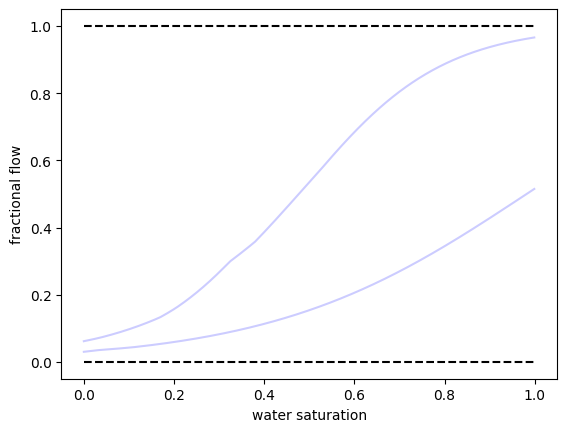

In [4]:

# https://perminc.com/resources/fundamentals-of-fluid-flow-in-porous-media/chapter-4-immiscible-displacement/buckley-leverett-theory/
mu_o = 5.0
mu_w = 1.0

ratio = lambda a, b, Sw : 1/(1 +  (mu_o/mu_w) * (a*np.exp(-b*Sw)))

a_mean = 5.0
b_mean = 5.0

a_std = a_mean/5
b_std = b_mean/5

# perturb a and b
aw = np.random.normal(loc=a_mean, scale=a_std, size=25)
bw = np.random.normal(loc=b_mean, scale=b_std, size=25)


Sw = np.arange(0.0, 1.0, 0.001)

fw = np.array([np.array([ratio(a, b, sw) for sw in Sw]) for a, b in zip(aw, bw)]).T

plt.figure()
plt.plot(Sw, np.percentile(fw, 95, axis=1), color="blue", alpha=0.2)
plt.plot(Sw, np.percentile(fw, 5, axis=1), color="blue", alpha=0.2)
plt.hlines(0.0, 0.0, 1.0, linestyles="dashed", colors="black")
plt.hlines(1.0, 0.0, 1.0, linestyles="dashed", colors="black")
plt.ylabel("fractional flow")
plt.xlabel("water saturation")